In [1]:
import h5py
import helpers
import openmc_sinbad_benchmarks as osb

In [2]:
# read sinbad data
exp_results = h5py.File('results_database/experiment.h5', 'r')
mcnp_results_fendl = h5py.File('results_database/mcnp-4b-c_fendl-2.h5', 'r')
mcnp_results_jendl = h5py.File('results_database/mcnp-4b-c_jendl-3-3.h5', 'r')

/home/segantin/openmc_models/models/openmc_sinbad_benchmarks_REWORK/openmc_sinbad_benchmarks/models/fns_duct/helpers.py:44: RuntimeWarning: invalid value encountered in divide
  return dataset['std. dev.'] / dataset['mean']


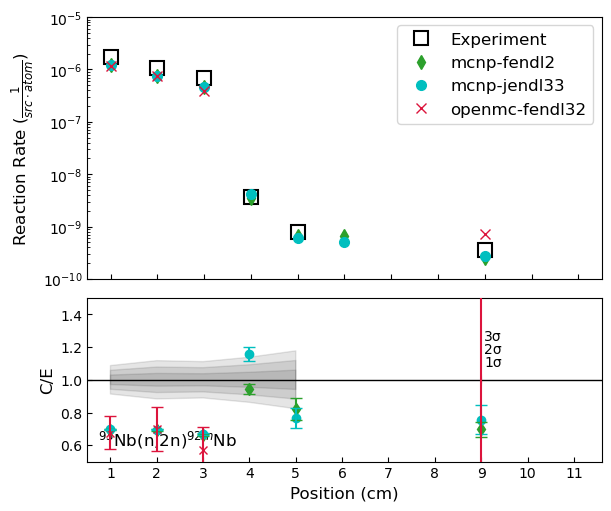

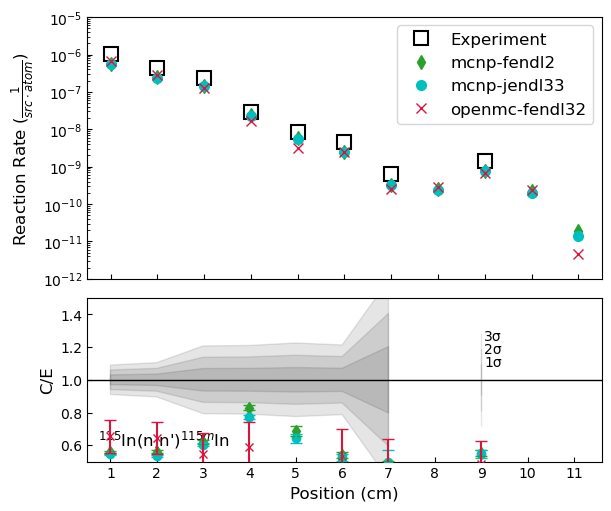

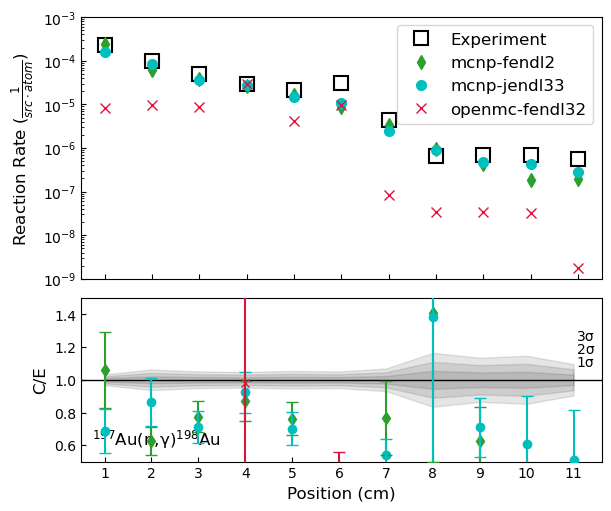

In [3]:
# initialization
path = 'reaction_rates/'
foil_list = ['nb93', 'in115', 'au197']
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{115}$In(n,n\')$^{115m}$In', '$^{197}$Au(n,\u03B3)$^{198}$Au']
ylabel = r'Reaction Rate $(\frac{1}{src \cdot atom})$'

for i,foil in enumerate(foil_list):
    measured = exp_results[path + f'{foil}/table']
    mcnp_fendl = mcnp_results_fendl[path + f'{foil}/table']
    mcnp_jendl = mcnp_results_jendl[path + f'{foil}/table']

    # read openmc results from its statepoint file
    omc_fendl = helpers.get_openmc_tally('statepoint.100.h5', f'{foil}_irdff_rr')
    omc_fendl = helpers.postprocess_openmc_foils(omc_fendl)

    # plot
    dtype_label = reaction_labels[i]
    foils = helpers.PlotReactionRates()  # the plot has always to be initialized like this
    foils.add_measured_data(measured, ylabel, dtype_label)  # measured data have always to be plotted
    foils.add_computed_data(mcnp_fendl, 'd', 'tab:green', 'mcnp-fendl2')  # one can add as many computed data as preferred
    foils.add_computed_data(mcnp_jendl, 'o', 'c', 'mcnp-jendl33')
    foils.add_computed_data(omc_fendl, 'x', 'crimson', 'openmc-fendl32')

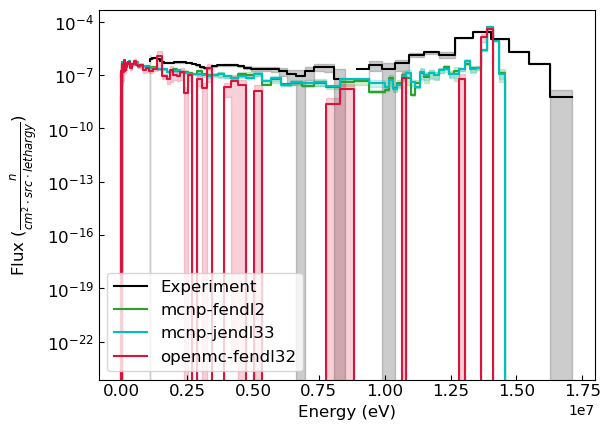

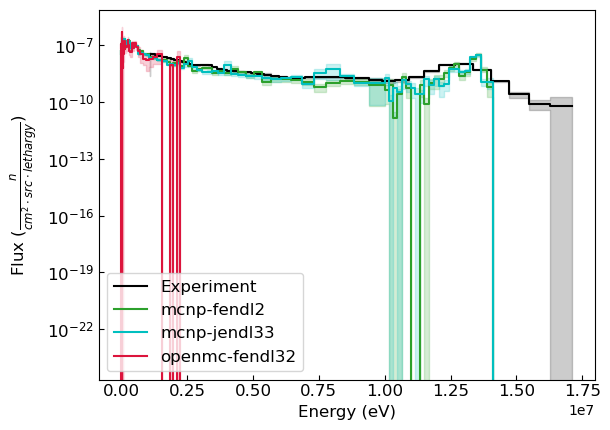

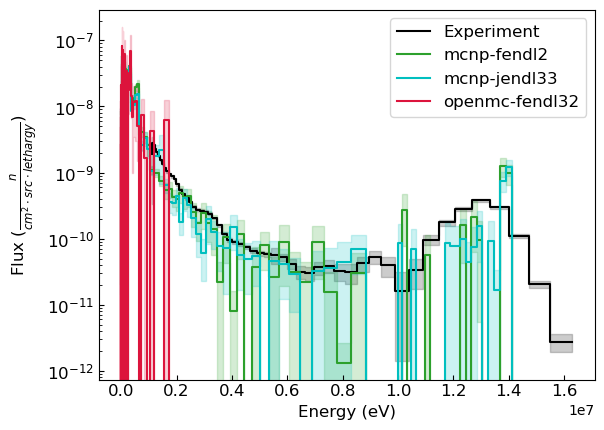

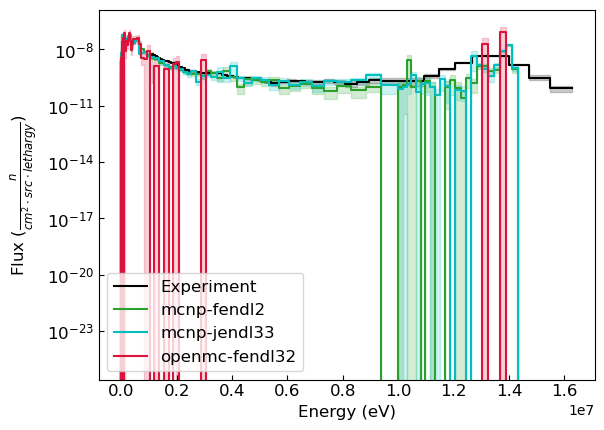

In [4]:
path = 'energy_spectra/'
detector_list = ['detector_3', 'detector_5', 'detector_7', 'detector_9']
detector_labels = ['detector 3', 'detector 5', 'detector 7', 'detector 9']
detector_cells = [303, 305, 307, 309]
ylabel = r'Flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'

for i, dl in enumerate(detector_list):
    measured = exp_results[path + f'{dl}/table']
    mcnp_fendl = mcnp_results_fendl[path + f'{dl}/table']
    mcnp_jendl = mcnp_results_jendl[path + f'{dl}/table']
    
    # read openmc results from its statepoint file
    omc_fendl = helpers.get_openmc_tally('statepoint.100.h5', 'detector_nspectrum')
    omc_fendl = helpers.postprocess_openmc_spectrum(omc_fendl, detector_cells[i])

    # plot
    dtype_label = detector_labels[i]
    spectra = helpers.PlotEnergySpectra()  # the plot has always to be initialized like this
    spectra.add_measured_data(measured, ylabel, dtype_label)  # measured data have always to be plotted
    spectra.add_computed_data(mcnp_fendl, 'tab:green', 'mcnp-fendl2')  # one can add as many computed data as preferred
    spectra.add_computed_data(mcnp_jendl, 'c', 'mcnp-jendl33')
    spectra.add_computed_data(omc_fendl, 'crimson', 'openmc-fendl32')

In [5]:
exp_results.close()
mcnp_results_fendl.close()
mcnp_results_jendl.close()